Data load from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#for Sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

**Quantitative Analysis Using PyNance and TA-Lib**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ta-lib-0.4.0-src.tar.gz to ta-lib-0.4.0-src.tar.gz


In [ ]:
!tar -xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [ ]:
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

/content/ta-lib
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /u

In [ ]:
!pip install TA-Lib

  Using cached TA-Lib-0.5.1.tar.gz (369 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=ta_lib-0.5.1-cp310-cp310-linux_x86_64.whl size=2415841 sha256=ea74d6a882f775a7399efae2c99dd8e65bd457b75ab5023bfae61e33db12bd41
  Stored in directory: /root/.cache/pip/wheels/6f/4c/41/864a7f29425201b8ba95dd8935d441bb0aff1b154514386c55
Successfully built TA-Lib


In [ ]:
!pip install pynance

In [ ]:
import talib as ta
import pynance as pn

In [ ]:
df_AAPL = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/AAPL_historical_data.csv")
df_AMZN = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/AMZN_historical_data.csv")
df_GOOG = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/GOOG_historical_data.csv")
df_META = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/MSFT_historical_data.csv")
df_MSFT = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/MSFT_historical_data.csv")
df_NVDA = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/NVDA_historical_data.csv")
df_TSLA = pd.read_csv("/content/drive/MyDrive/10Academy/week 1/yfinance_data/TSLA_historical_data.csv")

For the simplicty lets combine datasets

In [ ]:
dfs = [df_AAPL, df_AMZN, df_GOOG, df_META, df_MSFT, df_NVDA, df_TSLA]
combined_df = pd.concat(dfs, ignore_index=True)

Create a new column and give unique code

In [ ]:
df_AAPL['Company'] = 'AAPL'
df_AMZN['Company'] = 'AMZN'
df_GOOG['Company'] = 'GOOG'
df_META['Company'] = 'META'
df_MSFT['Company'] = 'MSFT'
df_NVDA['Company'] = 'NVDA'
df_TSLA['Company'] = 'TSLA'
combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Company'],
      dtype='object')

**Change to Date Time**

In [ ]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.set_index('Date', inplace=True)

**Calculate Technical Indicators for Each Company**

In [ ]:
company_indicators = {}

# Calculate each company
for company in combined_df['Company'].unique():
    df_company = combined_df[combined_df['Company'] == company].copy()

    #  Moving Averages
    df_company['SMA_30'] = ta.SMA(df_company['Close'], timeperiod=30)
    df_company['SMA_50'] = ta.SMA(df_company['Close'], timeperiod=50)

    #  RSI
    df_company['RSI'] = ta.RSI(df_company['Close'], timeperiod=14)

    #  MACD
    df_company['MACD'], df_company['MACD_Signal'], _ = ta.MACD(df_company['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    company_indicators[company] = df_company


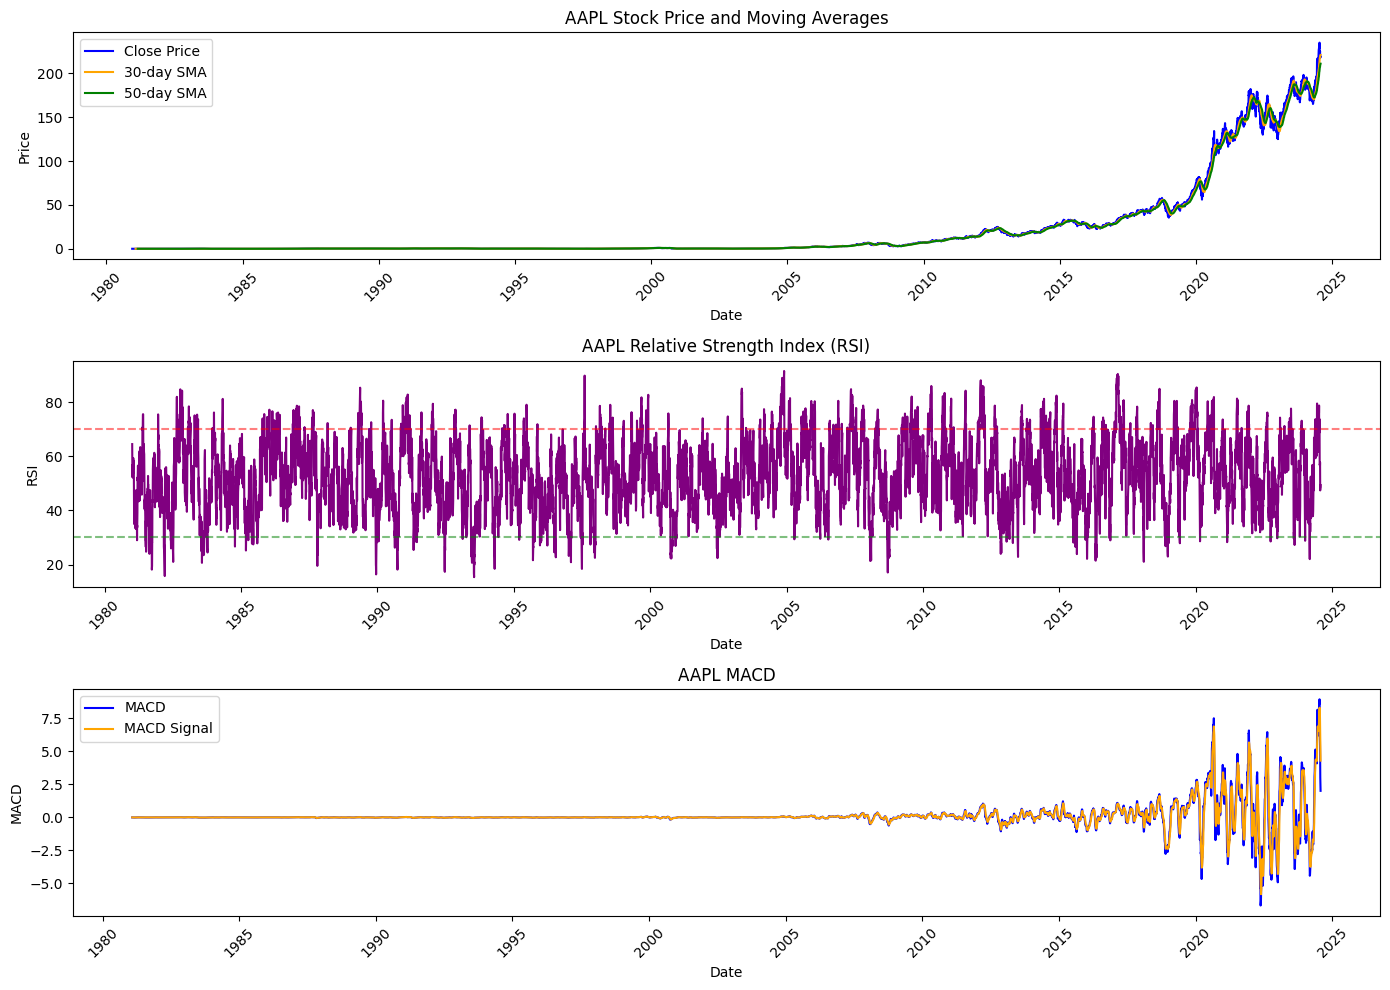

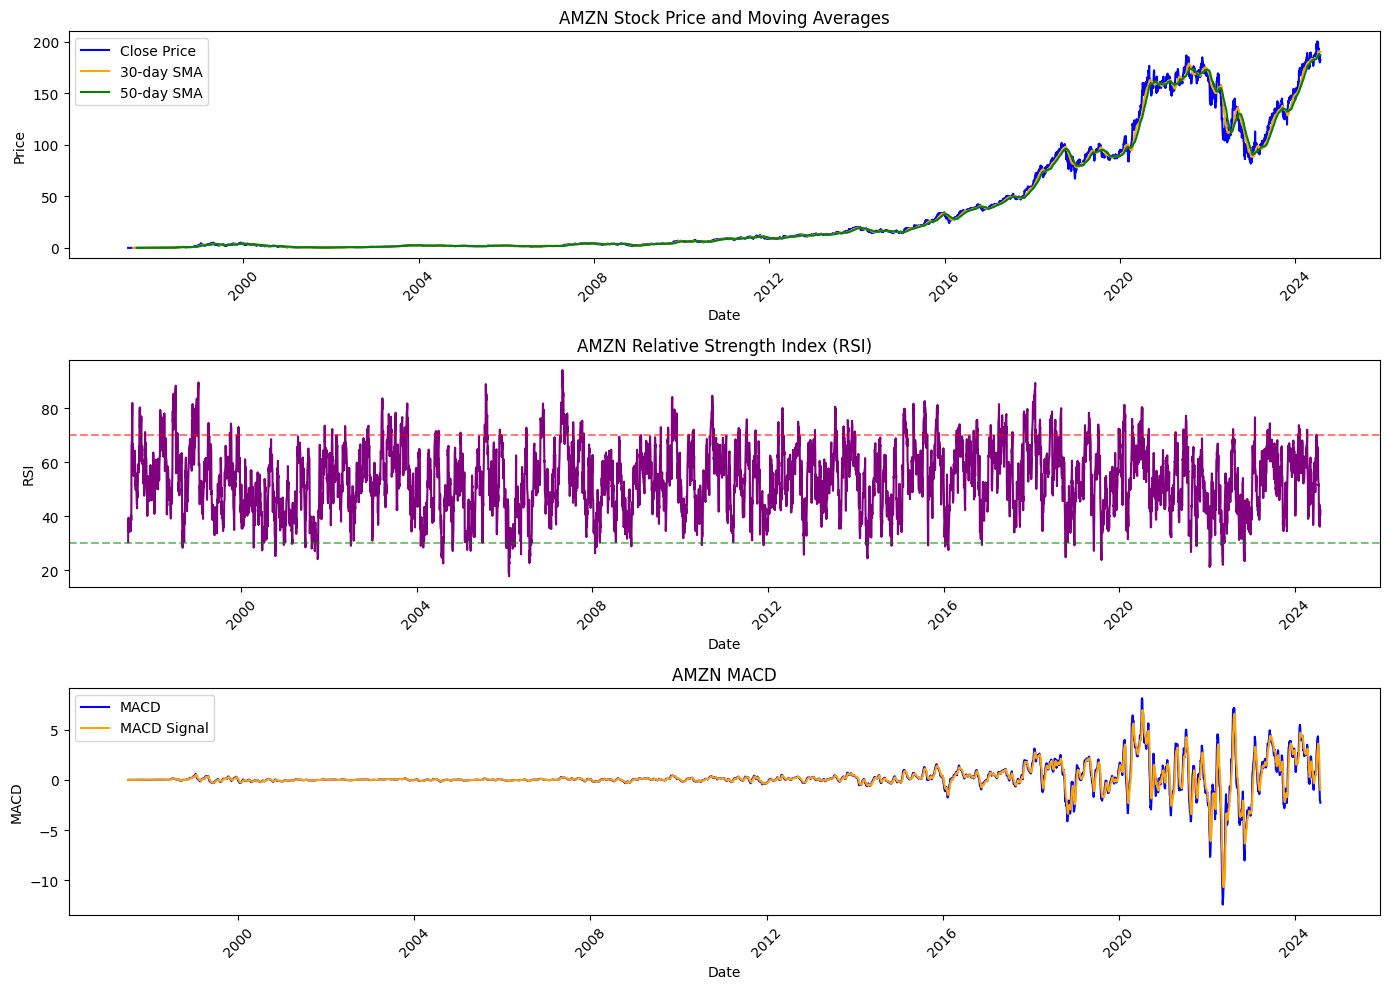

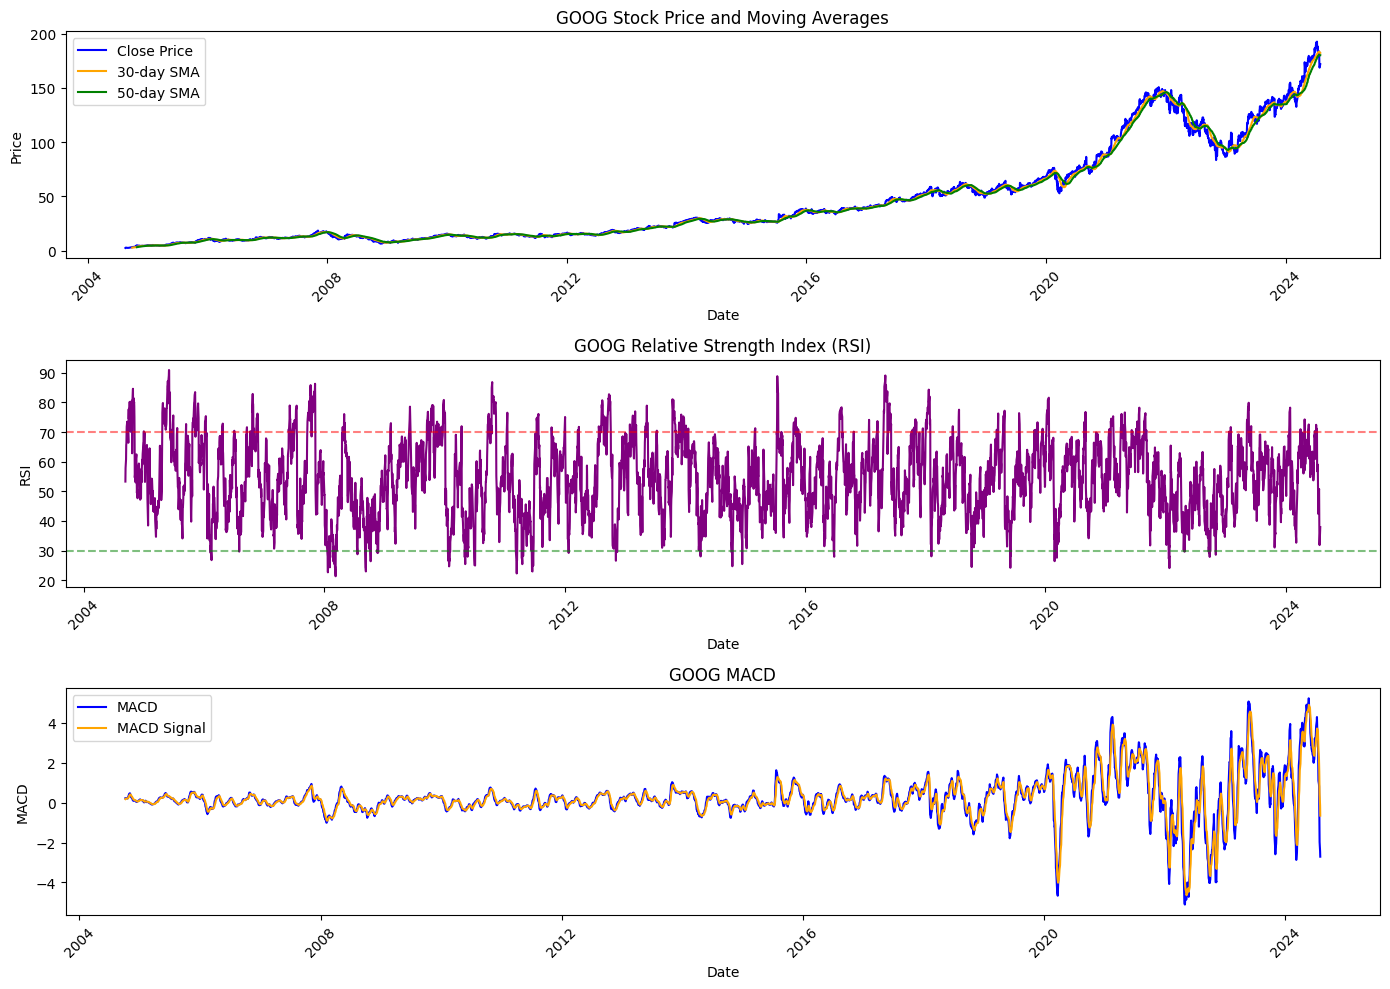

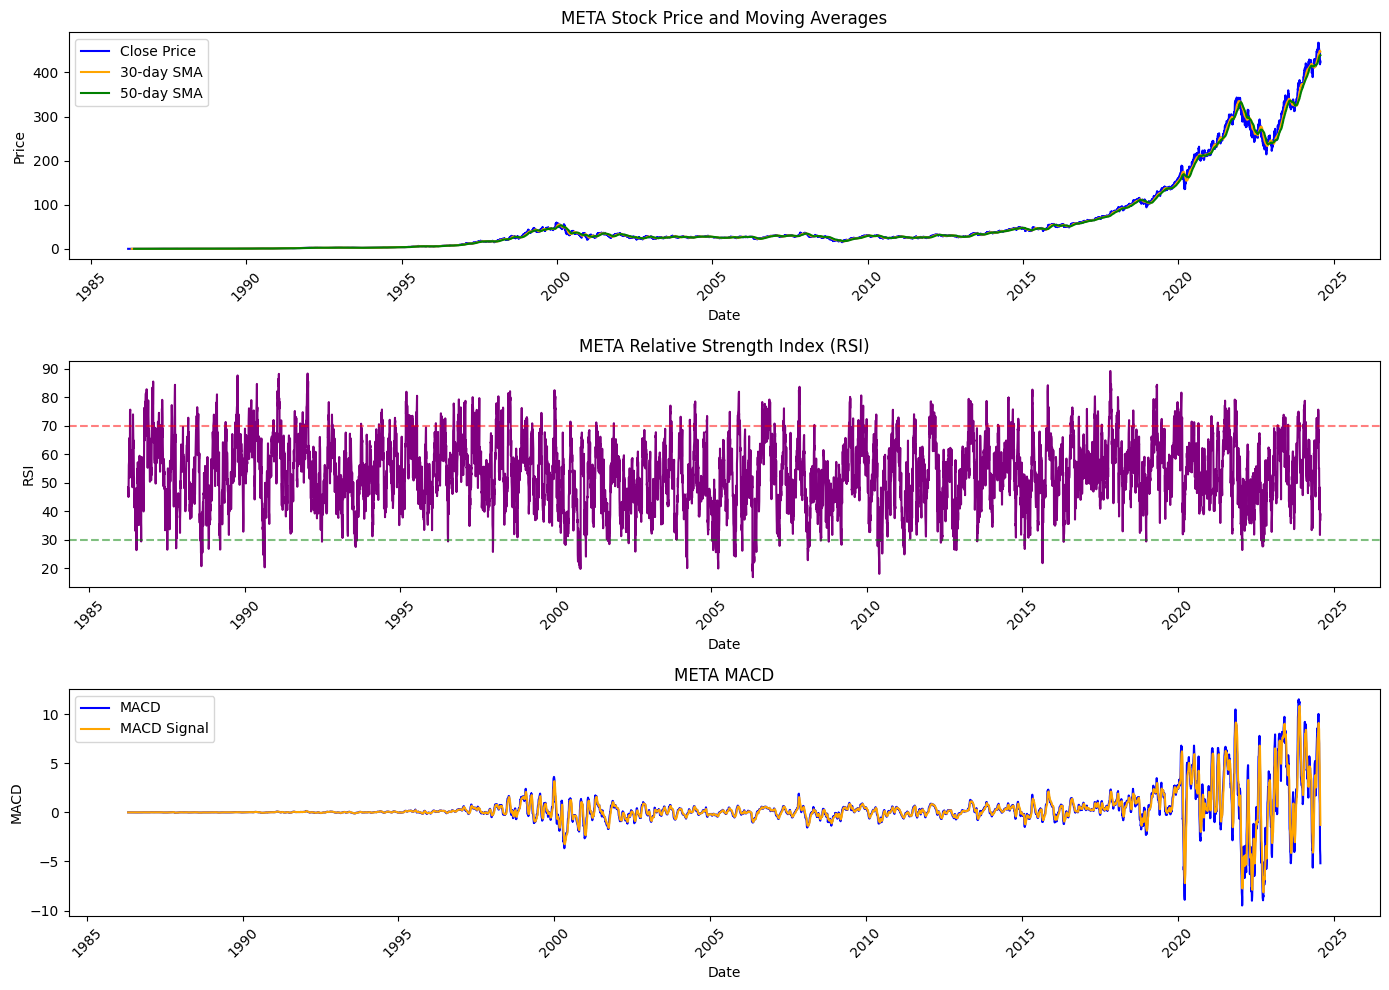

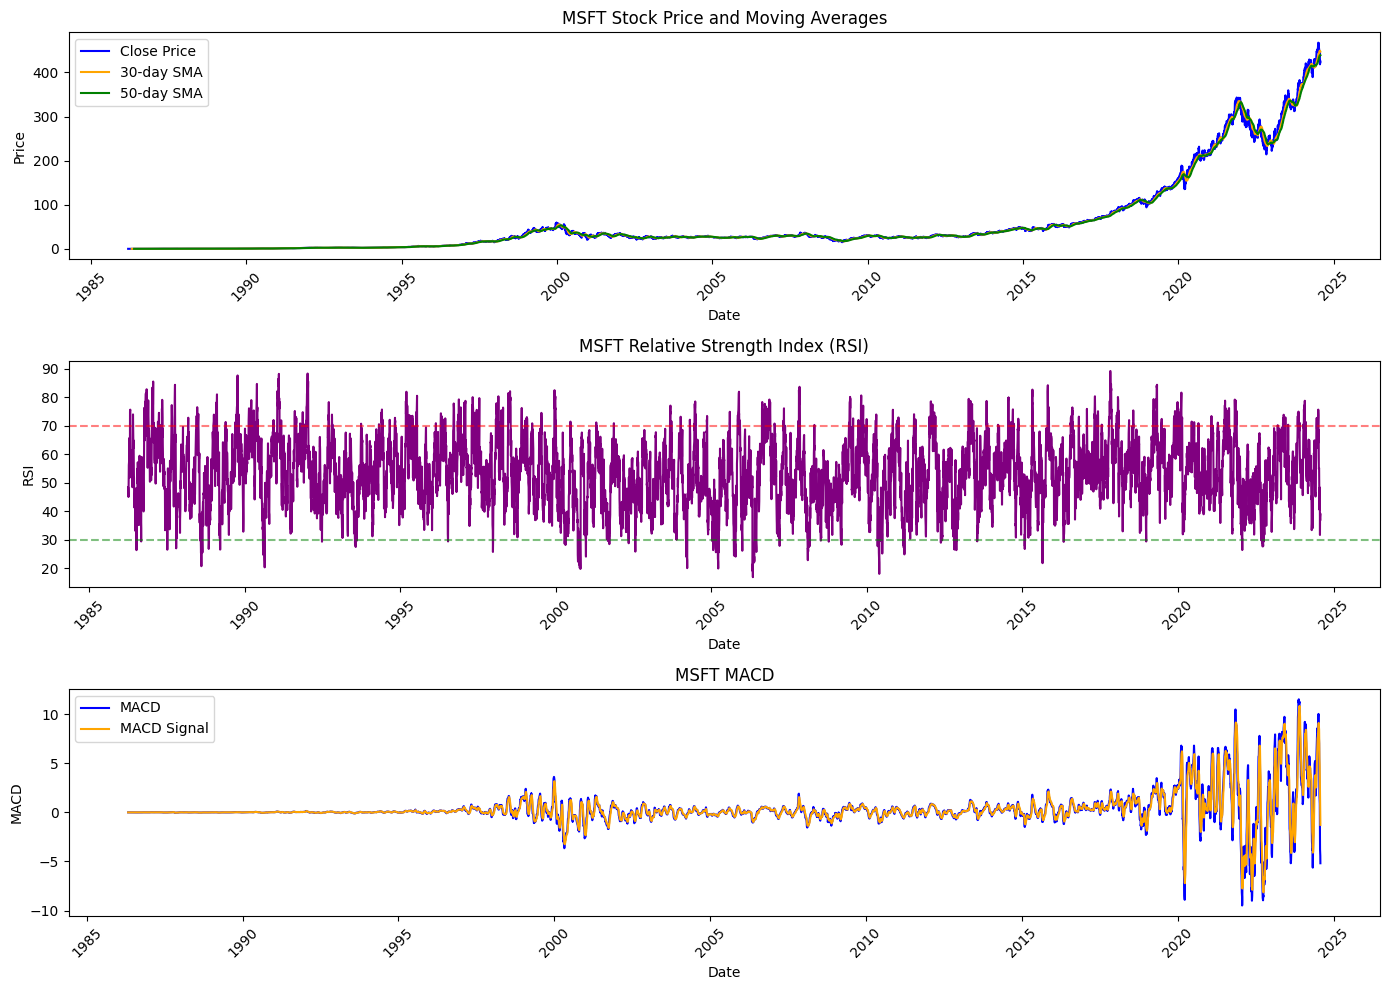

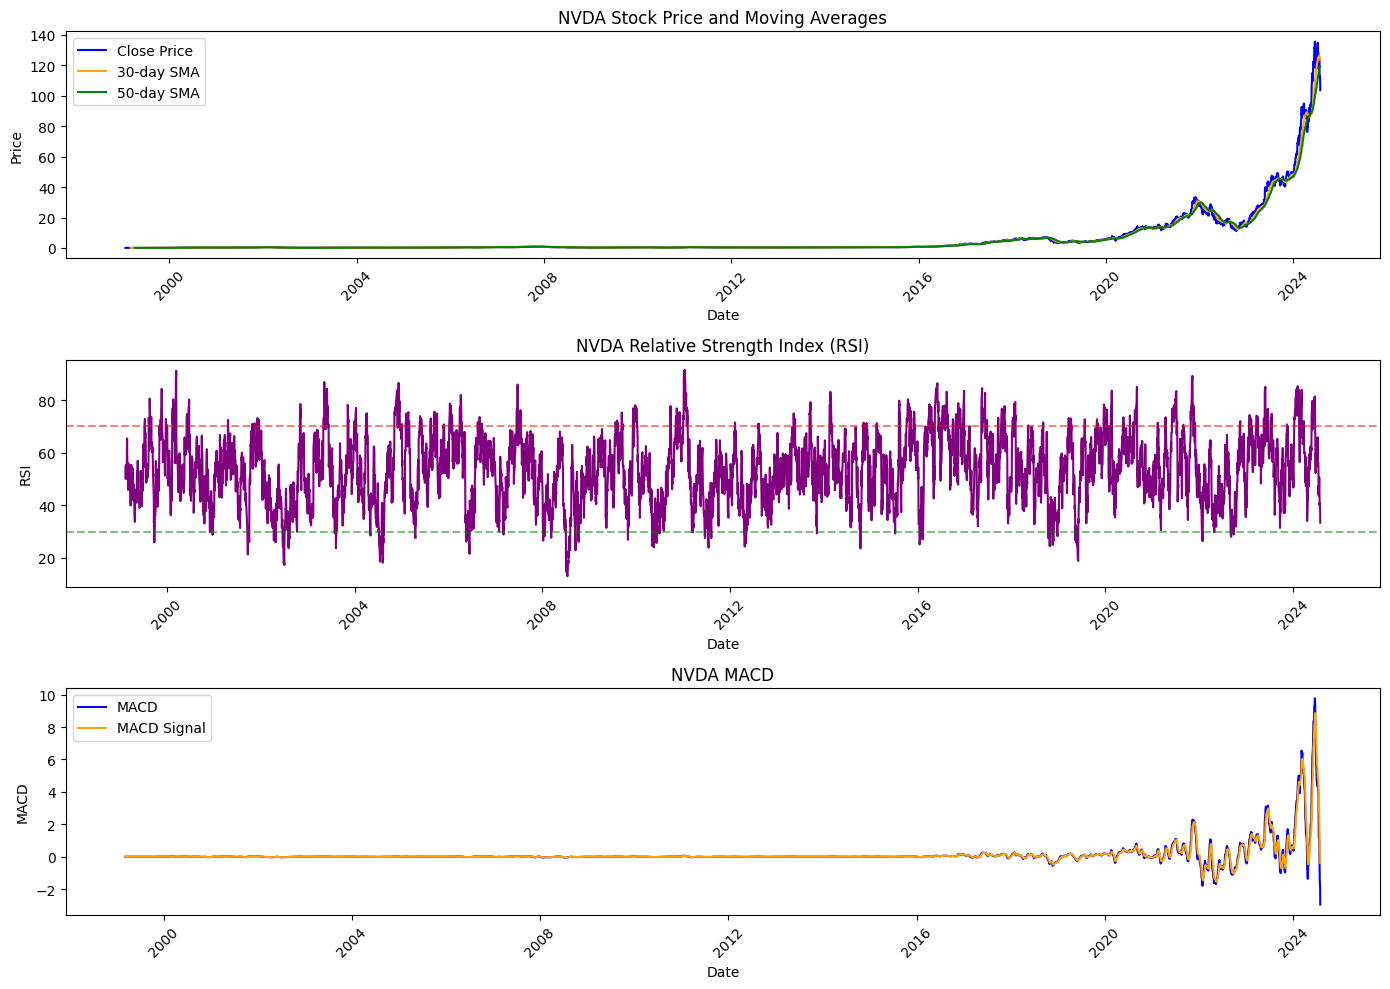

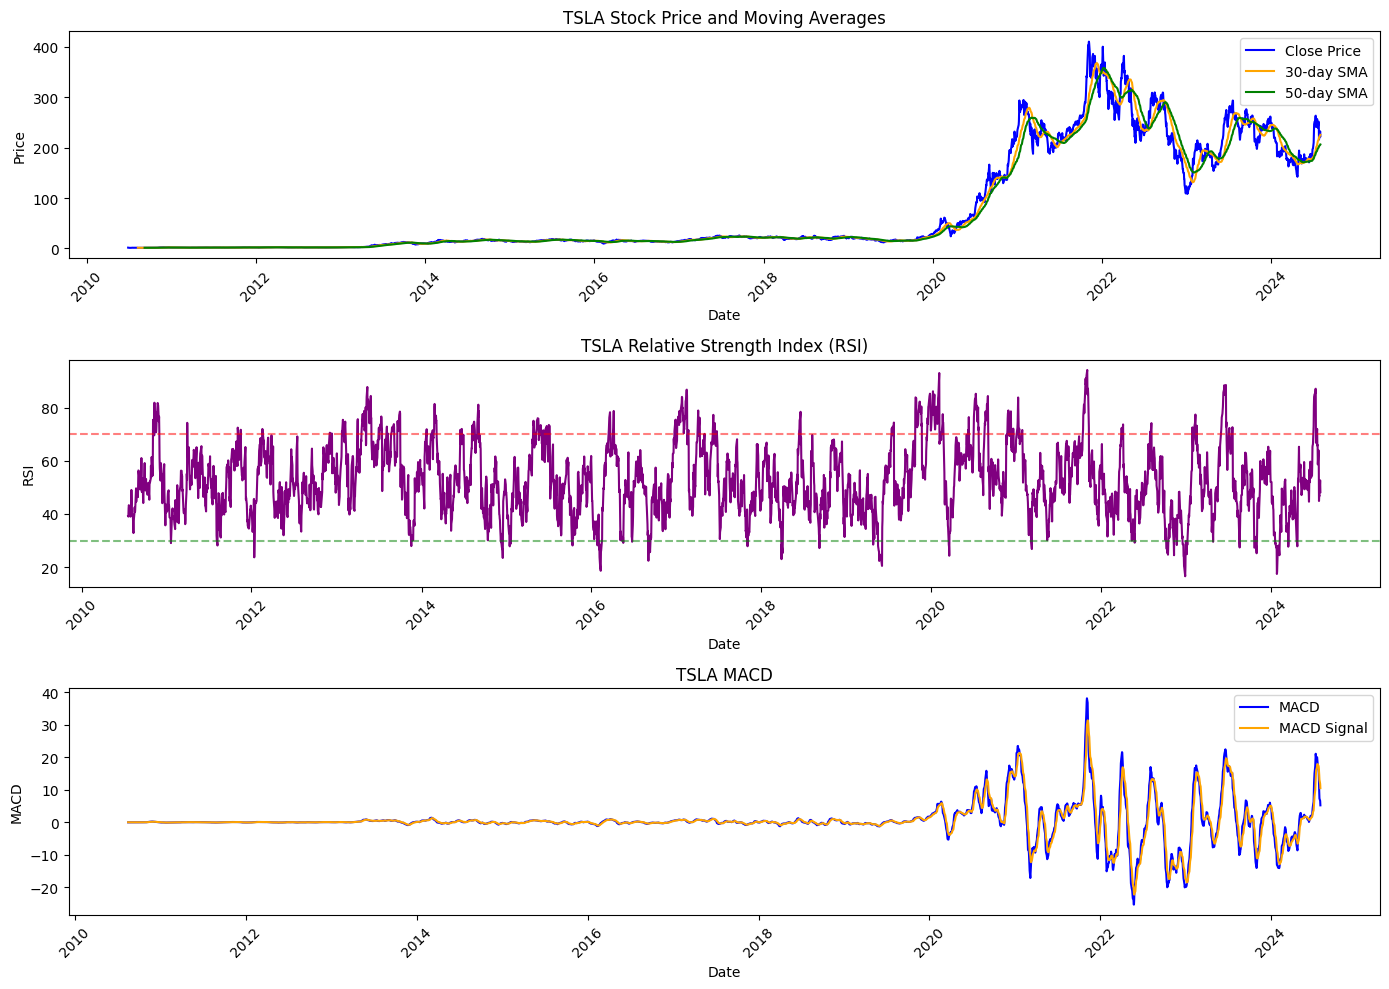

In [ ]:
def plot_company_indicators(df, company):
    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA_30'], label='30-day SMA', color='orange')
    plt.plot(df.index, df['SMA_50'], label='50-day SMA', color='green')
    plt.title(f'{company} Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought line
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold line
    plt.title(f'{company} Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.xticks(rotation=45)

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='orange')
    plt.title(f'{company} MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Visualize each company
for company, df in company_indicators.items():
    plot_company_indicators(df, company)